In [1]:
import pandas
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','smart_location'])
hosts = ab_df.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})

In [3]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv',usecols=['people_id','member_since','city','state','status'])

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)
cs_df_defhosts = cs_df[(cs_df['status'] == 'Accepting Guests')]

In [4]:
unique(cs_df['status'].values)

array(['Accepting Guests', 'Maybe Accepting Guests',
       'Not Accepting Guests', 'Wants to Meet Up'], dtype=object)

In [5]:
hosts['host_since'] = hosts['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)

In [6]:
ab_since_global = hosts.groupby(by='host_since').agg(len)

In [7]:
ab_daily_roll = pandas.rolling_mean(ab_since_global, window=10)

(array([ 733408.,  733773.,  734138.,  734503.,  734869.,  735234.,
         735599.,  735964.]), <a list of 8 Text xticklabel objects>)

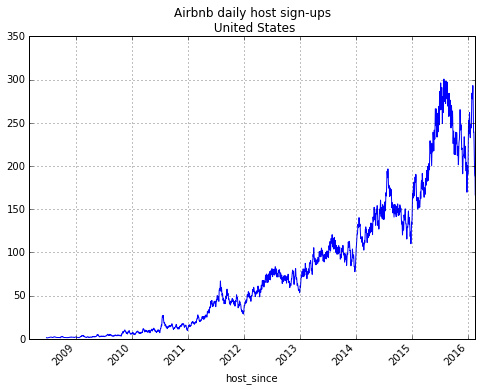

In [8]:
ax = ab_daily_roll.plot(legend=False, title='Airbnb daily host sign-ups \n United States', figsize=(8,6))
plt.xticks(rotation=45)

In [9]:
cs_since_global = cs_df.groupby(by='member_since').count()
cs_since_global_defhosts = cs_df_defhosts.groupby(by='member_since').count()

In [10]:
cs_since_global

,city,people_id,state,status
member_since,,,,
2003-01-01,53,53,53,53
2004-01-01,1396,1398,1398,1398
2005-01-01,6854,6856,6856,6856
2006-01-01,10307,10321,10321,10321
2007-01-01,23286,23307,23307,23307
2008-01-01,39086,39110,39110,39110
2009-01-01,47375,47427,47427,47427
2010-01-01,47326,47385,47385,47385
2011-01-01,36424,36491,36491,36491


In [11]:
cs_since_global_defhosts

,city,people_id,state,status
member_since,,,,
2003-01-01,31,31,31,31
2004-01-01,867,868,868,868
2005-01-01,3835,3837,3837,3837
2006-01-01,6038,6046,6046,6046
2007-01-01,13958,13967,13967,13967
2008-01-01,23593,23604,23604,23604
2009-01-01,28885,28905,28905,28905
2010-01-01,29183,29206,29206,29206
2011-01-01,20815,20840,20840,20840


# Average 2013

In [12]:
cs_since_global_2013mean = cs_since_global_defhosts.copy()

In [13]:
cs_since_global_2013mean.ix['2013-01-01'] = (cs_since_global_2013mean.ix['2012-01-01'] + cs_since_global_2013mean.ix['2014-01-01']) / 2

In [14]:
cs_year_roll = pandas.rolling_mean(cs_since_global['people_id'], window=2)
cs_year_roll_defhosts = pandas.rolling_mean(cs_since_global_defhosts['people_id'], window=2)



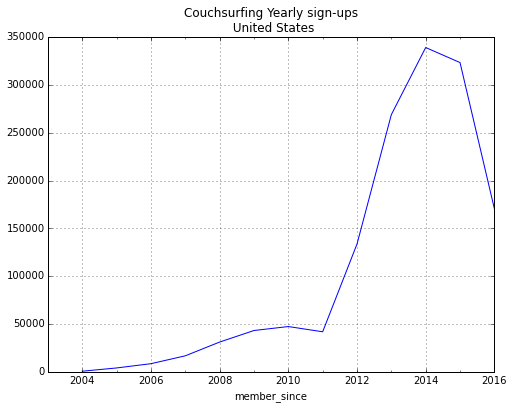

In [15]:
cs_year_roll.plot(title="Couchsurfing Yearly sign-ups\n United States", figsize=(8,6))

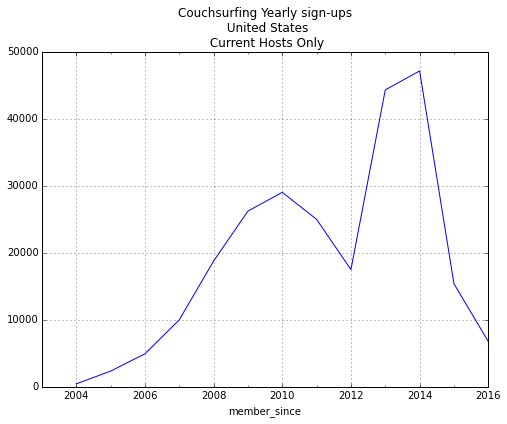

In [16]:
cs_year_roll_defhosts.plot(title="Couchsurfing Yearly sign-ups\n United States\n Current Hosts Only", figsize=(8,6))

In [17]:
ab_since_year = ab_since_global.groupby(by=lambda x: x.year).agg(sum)
cs_since_year = pandas.DataFrame(cs_since_global.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts = pandas.DataFrame(cs_since_global_defhosts.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_2013mean = pandas.DataFrame(cs_since_global_2013mean.groupby(by=lambda x: x.year).agg(sum)['people_id'])

In [18]:
ab_since_year.columns = ['signups']
cs_since_year.columns = ['signups']
cs_since_year_defhosts.columns = ['signups']
cs_since_year_2013mean.columns = ['signups']

In [19]:
abcs = ab_since_year.join(cs_since_year,how='outer',lsuffix='_ab', rsuffix='_cs')
abcs_all= abcs.join(cs_since_year_defhosts, rsuffix='_cs_definitehosts')
abcs_defhost = ab_since_year.join(cs_since_year_defhosts,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts')
abcs_2013mean = ab_since_year.join(cs_since_year_2013mean,how='outer',lsuffix="_ab", rsuffix='_cs_2013mean')

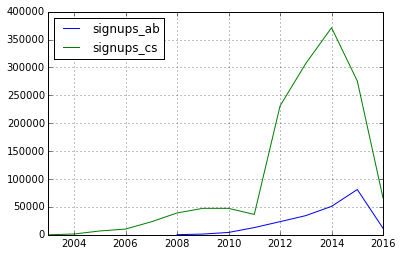

In [20]:
abcs.plot()

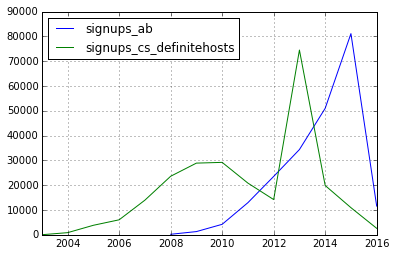

In [21]:
abcs_defhost.plot()

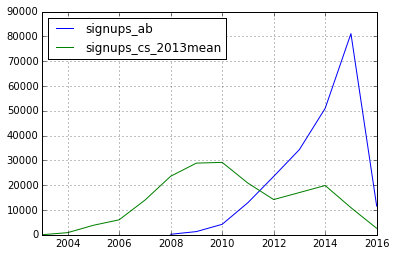

In [22]:
abcs_2013mean.plot()

signups - defintiely host, signups_cs - includes maybe accepting. No 2013 adjustment

In [27]:
abcs_all.corr()

,signups_ab,signups_cs,signups
signups_ab,1.000000,0.814058,-0.053600
signups_cs,0.814058,1.000000,0.478641
signups,-0.053600,0.478641,1.000000


In [23]:
abcs_2013mean.ix[2008:2015].corr()

,signups_ab,signups_cs_2013mean
signups_ab,1.000000,-0.797019
signups_cs_2013mean,-0.797019,1.000000


BY CITY
========

In [92]:
state_dict = dict( (('Alabama', 'AL'),
       ('Alaska', 'AK'),
       ('Arizona', 'AZ'),
       ('Arkansas', 'AR'),
       ('California', 'CA'),
       ('Colorado', 'CO'),
       ('Connecticut', 'CT'),
       ('Delaware', 'DE'),
       ('District of Columbia', 'DC'),
       ('Florida', 'FL'),
       ('Georgia', 'GA'),
       ('Hawaii', 'HI'),
       ('Idaho', 'ID'),
       ('Illinois', 'IL'),
       ('Indiana', 'IN'),
       ('Iowa', 'IA'),
       ('Kansas', 'KS'),
       ('Kentucky', 'KY'),
       ('Louisiana', 'LA'),
       ('Maine', 'ME'),
       ('Maryland', 'MD'),
       ('Massachusetts', 'MA'),
       ('Michigan', 'MI'),
       ('Minnesota', 'MN'),
       ('Mississippi', 'MS'),
       ('Missouri', 'MO'),
       ('Montana', 'MT'),
       ('Nebraska', 'NE'),
       ('Nevada', 'NV'),
       ('New Hampshire', 'NH'),
       ('New Jersey', 'NJ'),
       ('New Mexico', 'NM'),
       ('New York', 'NY'),
       ('North Carolina', 'NC'),
       ('North Dakota', 'ND'),
       ('Ohio', 'OH'),
       ('Oklahoma', 'OK'),
       ('Oregon', 'OR'),
       ('Pennsylvania', 'PA'),
       ('Rhode Island', 'RI'),
       ('South Carolina', 'SC'),
       ('South Dakota', 'SD'),
       ('Tennessee', 'TN'),
       ('Texas', 'TX'),
       ('Utah', 'UT'),
       ('Vermont', 'VT'),
       ('Virginia', 'VA'),
       ('Washington', 'WA'),
       ('West Virginia', 'WV'),
       ('Wisconsin', 'WI'),
       ('Wyoming', 'WY')) )

def state_lookup(s):
    if len(s) ==2:
        return s.lower()
    else:
        try:
            return state_dict[s].lower()
        except KeyError:
            print(s)
            return float('nan')

In [93]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [94]:
cs_df['state'] = cs_df['state'].map(state_lookup)
cs_df['city'] = cs_df['city'].apply(lambda x: x.strip().lower())
cs_df['state'] = cs_df['state'].apply(lambda x: x.strip().lower())
cs_df['citystate'] = cs_df['city'] + '_' + cs_df['state']
cs_df['year'] = cs_df['member_since'].apply(lambda x: x.year)

In [95]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [96]:
cs_df_all = cs_df[['citystate','year','people_id']]
cs_df_definite = cs_df[cs_df['status'] == 'Accepting Guests'][['citystate','year','people_id']]

In [97]:
cs_citystate = cs_df_definite.groupby(by=['citystate','year']).agg(len)

# Average out the 2013 anomaly

In [98]:
cs_citystate.columns = ['signups']

In [99]:
cs_citystate.unstack()['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    74461
2014    19811
2015    10563
2016     2480
dtype: float64

In [100]:
cs_citystate_unstacked = cs_citystate.unstack()
cs_citystate_unstacked.fillna(0, inplace=True)
mean2013 = (cs_citystate_unstacked['signups'][2012] +  cs_citystate_unstacked['signups'][2014]) /2

In [101]:
mean2013.sum()

16991.0

In [102]:
cs_citystate_2013mean = cs_citystate_unstacked.copy()

In [103]:
cs_citystate_2013mean.columns

MultiIndex(levels=[['signups'], [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=[None, 'year'])

In [105]:
cs_citystate_2013mean.loc[:,('signups',2013)] = mean2013

In [106]:
cs_citystate_2013mean['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    16991
2014    19811
2015    10563
2016     2480
dtype: float64

In [107]:
ab_loc = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','city','state'])
hosts_loc = ab_df.groupby(by='host_id',as_index=True).agg(min)

In [108]:
print(len(ab_loc))
ab_loc.dropna(inplace=True)
print(len(ab_loc))

337213
336140


In [110]:
ab_loc['city'] = ab_loc['city'].apply(lambda x: x.strip().lower())
ab_loc['state'] = ab_loc['state'].apply(lambda x: x.strip().lower())
ab_loc['citystate'] = ab_loc['city'] + '_' + ab_loc['state']
ab_loc['host_since'] = ab_loc['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_loc['year'] = ab_loc['host_since'].apply(lambda x: x.year)

In [111]:
ab_loc = ab_loc[['citystate','year','host_id']]
ab_citystate = ab_loc.groupby(by=['citystate','year']).agg(len)

In [112]:
ab_citystate.columns = ['signups']

In [120]:
abcs_citystate = pandas.merge(cs_citystate, ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_2013mean = pandas.merge(cs_citystate_2013mean.stack(), ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))

In [121]:
abcs_citystate.fillna(0, inplace=True)
abcs_citystate_2013mean.fillna(0, inplace=True)

In [122]:
cs_cum = abcs_citystate.unstack()['signups_cs'].sum(axis=1)
cs_cum_2013mean = abcs_citystate_2013mean.unstack()['signups_cs'].sum(axis=1)
ab_cum = abcs_citystate.unstack()['signups_ab'].sum(axis=1)

In [124]:
dual_min = 100
big_cities = abcs_citystate.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities = abcs_citystate.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]
big_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]

# City Size in General, Correlations

In [125]:
big_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.483983
signups_ab,0.483983,1.000000


In [126]:
small_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,-0.028088
signups_ab,-0.028088,1.000000


In [128]:
big_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.480205
signups_ab,0.480205,1.000000


In [130]:
small_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.111111
signups_ab,0.111111,1.000000


# City Size Graphs 2013-spikey

In [ ]:
big_cities_groups = big_cities.stack().groupby(level=0)

big_cities_corr = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr['signups_ab']
big_cities_corr.columns = ['signup_abcs_correlation']

big_cities_corr.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# City Size, with 2013 mean adjusted

# Top and Bottom 10 Cities by Host Signup Correlation
astoria_ny -0.364107865481
saint augustine_fl -0.303149260148
brooklyn_ny -0.269244128978
bronx_ny -0.264384441426
kirkland_wa -0.219428580846
mesa_az -0.219215313176
saint paul_mn -0.216181239653
fremont_ca -0.197336542205
missoula_mt -0.18691885262
decatur_ga -0.18309414405
redmond_wa -0.164192066597
anchorage_ak -0.152963765834
bozeman_mt -0.146744075458
eugene_or -0.142658297903
sarasota_fl -0.142544711873
honolulu_hi 0.358077085692
palo alto_ca 0.369990038288
chattanooga_tn 0.385215185688
las vegas_nv 0.386258456862
savannah_ga 0.394036353337
los angeles_ca 0.407625478893
mountain view_ca 0.439754175054
detroit_mi 0.456108965722
myrtle beach_sc 0.465062838633
santa monica_ca 0.481056269234
lafayette_la 0.525119059271
west hollywood_ca 0.551041349967
new york_ny 0.615211736253
miami beach_fl 0.666030111452
washington_dc 0.824400838559
# Top and Bottom 10 Cities by AB size
new york_ny 6372.5
brooklyn_ny 1758.5
los angeles_ca 4518

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


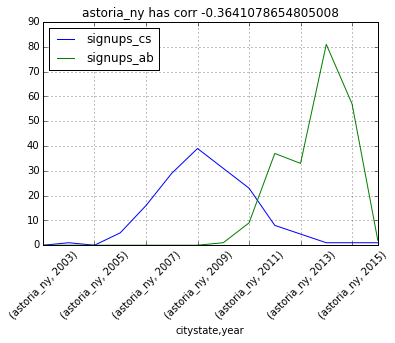

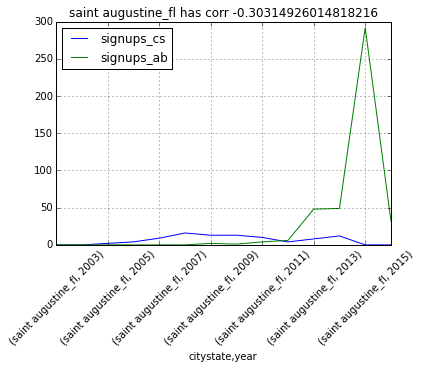

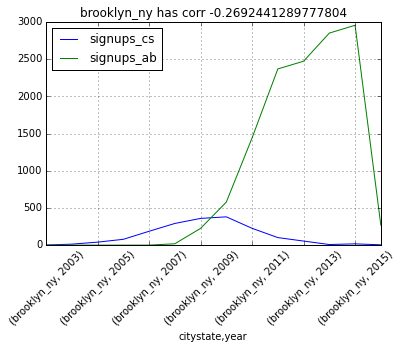

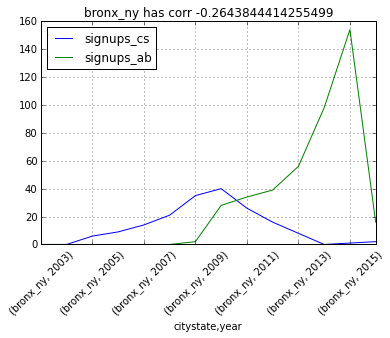

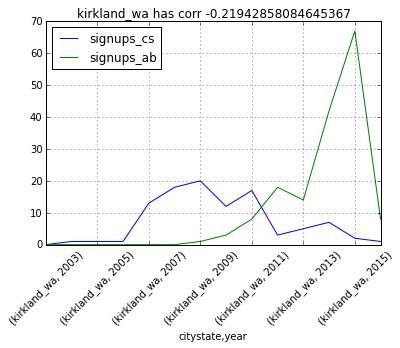

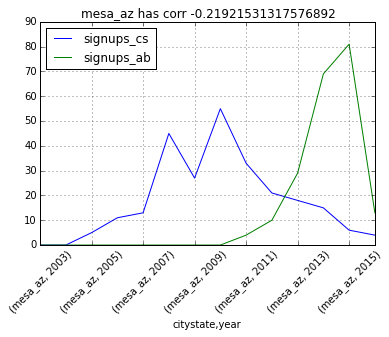

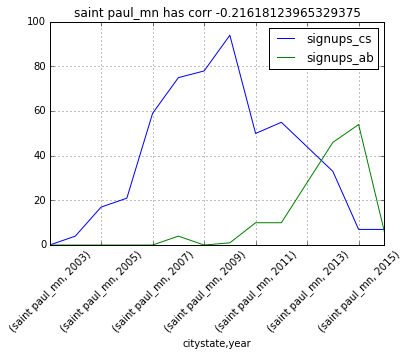

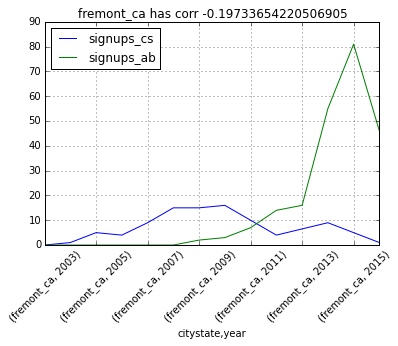

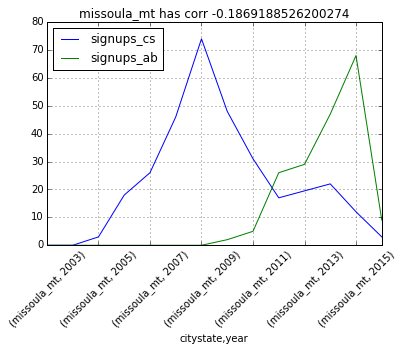

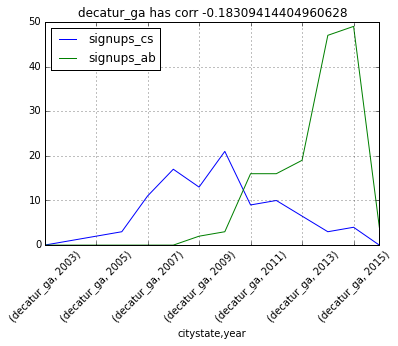

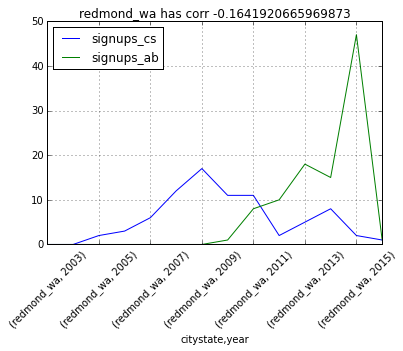

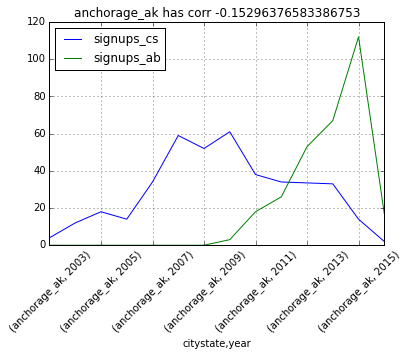

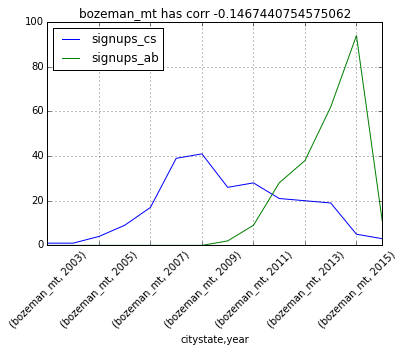

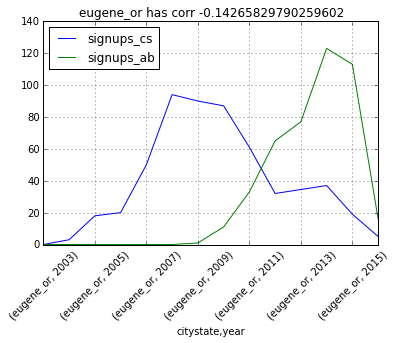

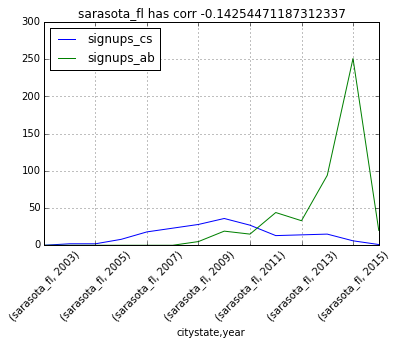

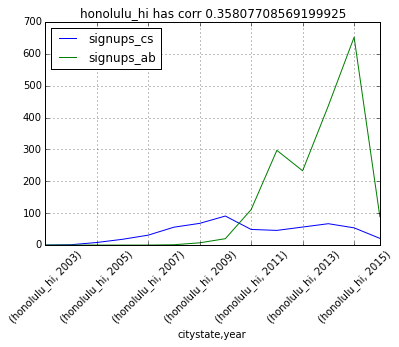

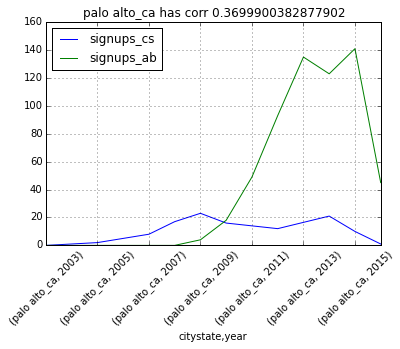

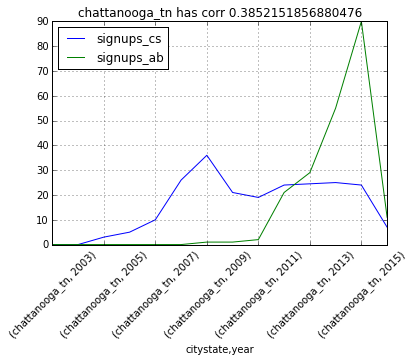

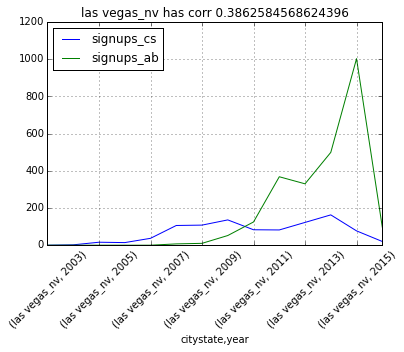

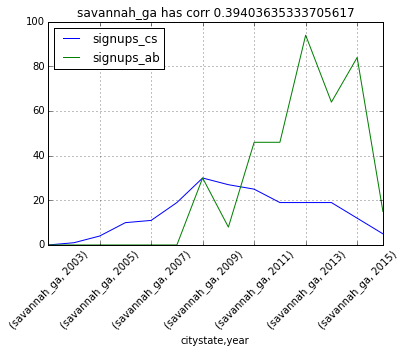

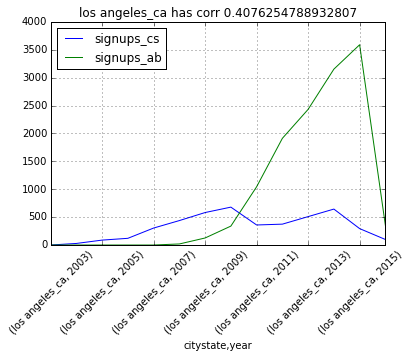

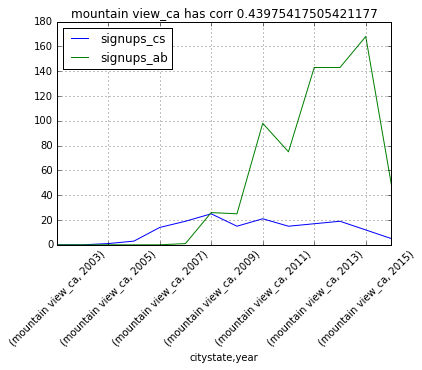

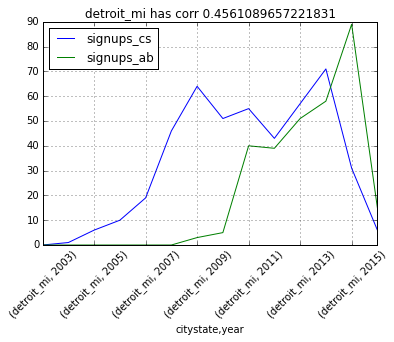

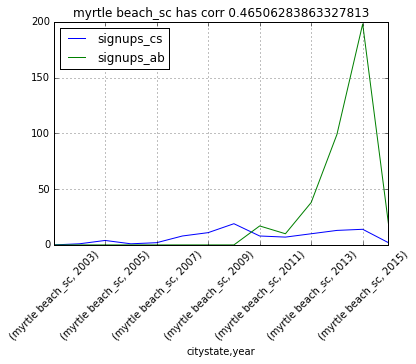

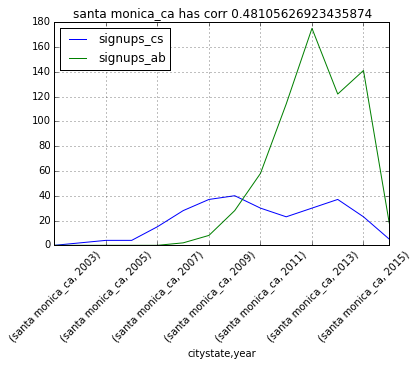

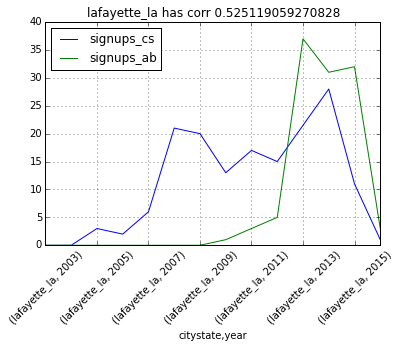

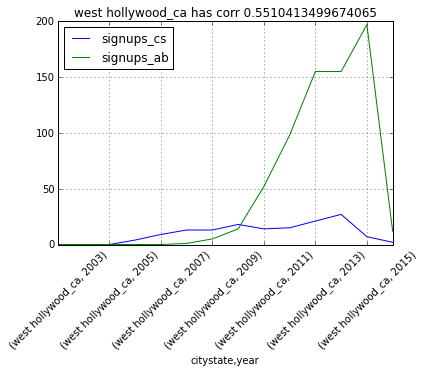

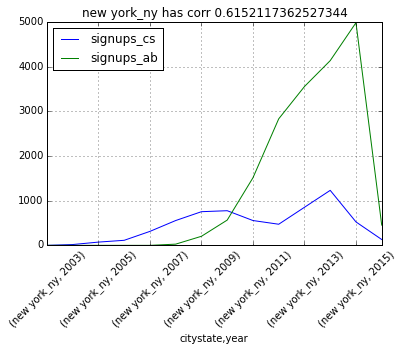

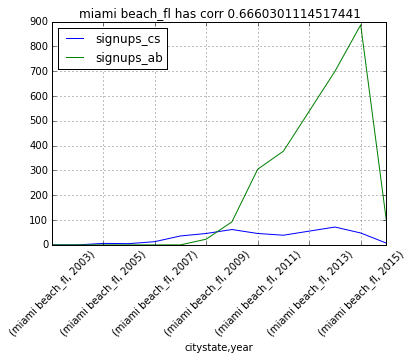

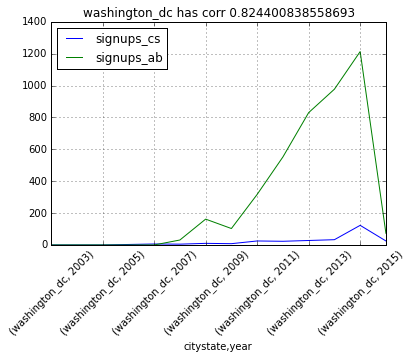

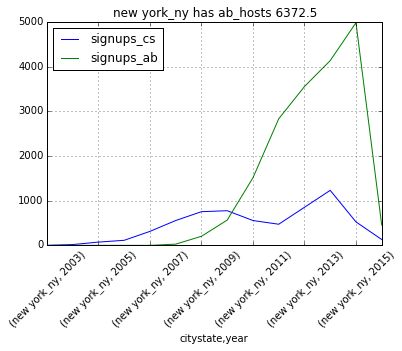

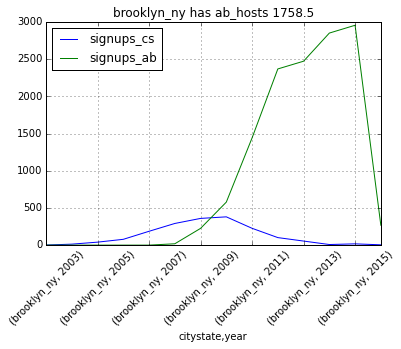

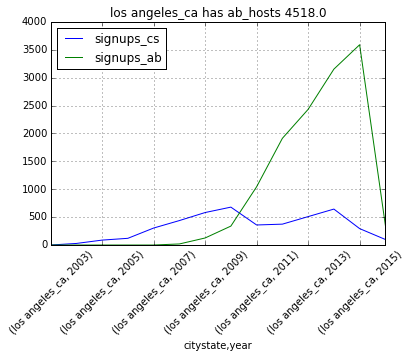

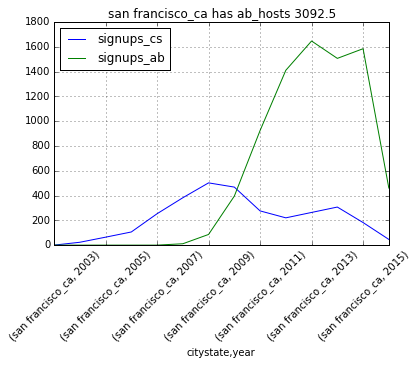

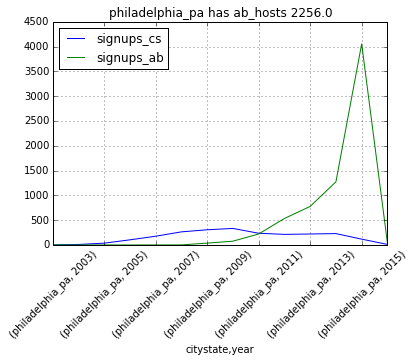

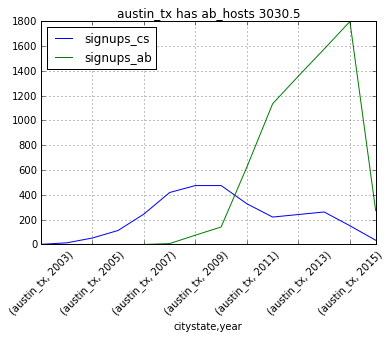

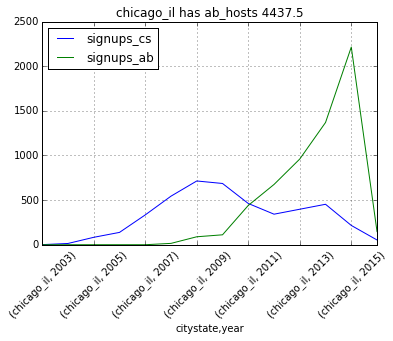

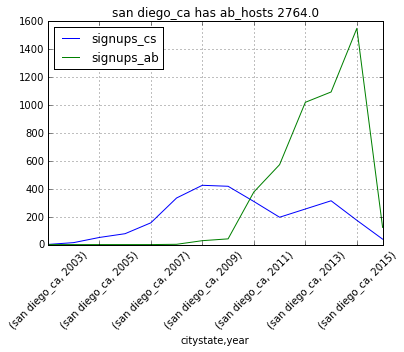

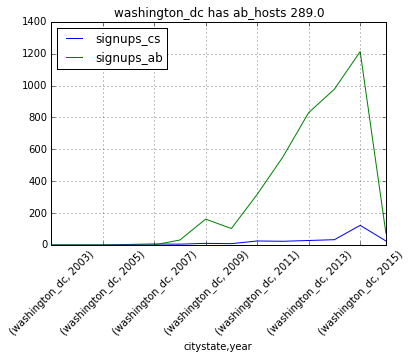

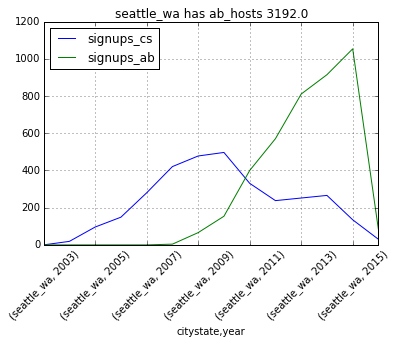

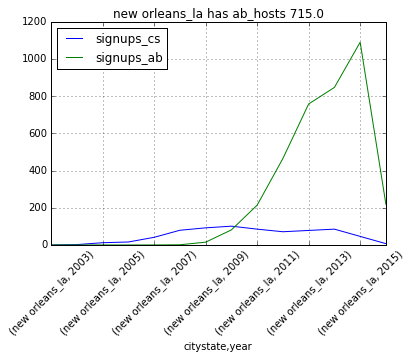

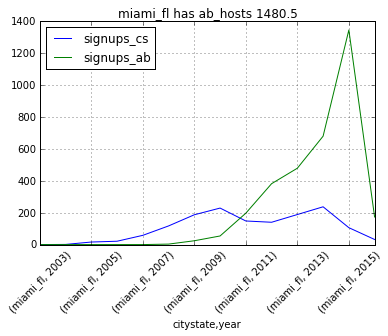

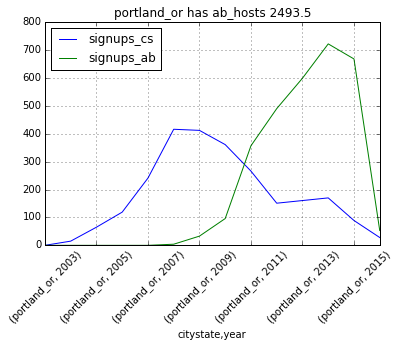

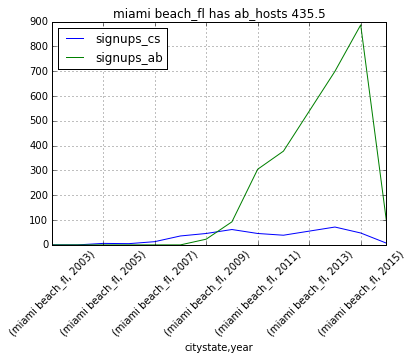

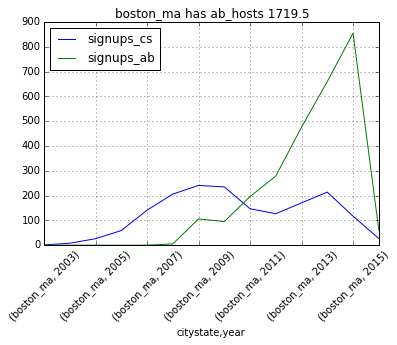

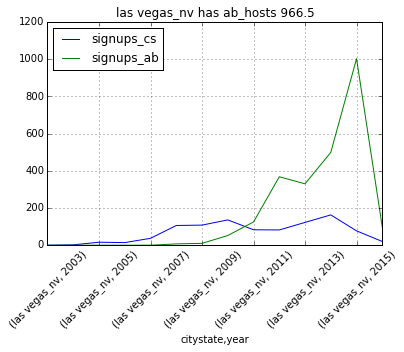

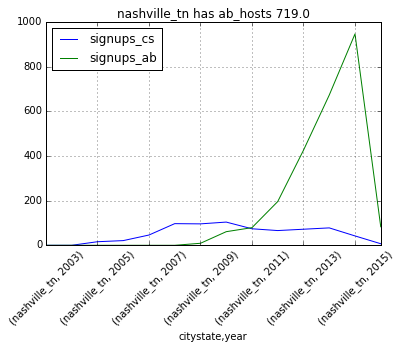

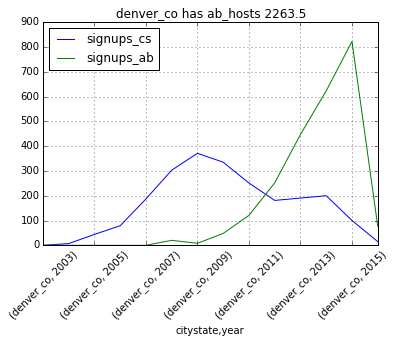

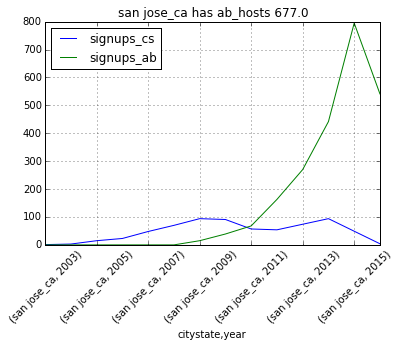

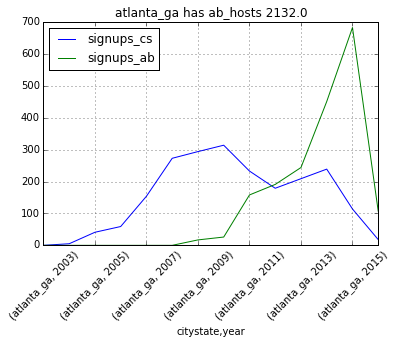

In [131]:
big_cities_groups = big_cities_2013mean.stack().groupby(level=0)

big_cities_corr = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr['signups_ab']
big_cities_corr.columns = ['signup_abcs_correlation']

big_cities_corr.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Load Census Data

In [173]:
census_df = pandas.read_csv('geographic/nhgis0005_csv/nhgis0005_ds206_20145_2014_place.csv',encoding = "ISO-8859-1",usecols=['STATE','PLACE','ABDPE001'])

In [193]:
%%capture
census_df['state_abbr'] = census_df['STATE'].apply(state_lookup)

In [175]:
census_df.dropna(inplace=True) #gets rid of puerto rico.

In [176]:
census_df['place_end'] = census_df['PLACE'].apply(lambda x: x.split(" ")[-1])

In [177]:
census_df.tail()

,STATE,PLACE,ABDPE001,state_abbr,place_end
29291,Wyoming,Woods Landing-Jelm CDP,13958,wy,CDP
29292,Wyoming,Worland city,38652,wy,city
29293,Wyoming,Wright town,80272,wy,town
29294,Wyoming,Yoder town,36250,wy,town
29295,Wyoming,Y-O Ranch CDP,51852,wy,CDP


In [178]:
census_df['place_end'].value_counts()

city            10131
CDP              8962
town             4319
village          3752
borough          1205
County)           116
(balance)           8
municipality        4
government          4
Counties)           3
County              3
City                1
county              1
Princeton           1
corporation         1
dtype: int64

In [205]:
def norm_place(s):
    end = s.split(" ")[-1]
    if end in ['city','CDP','town','village', 'borough', 'municipality']:
        snorm = ' '.join(s.split(' ')[:-1])
        return snorm.lower()
    else:
        return s

In [206]:
census_df['place_norm'] = census_df['PLACE'].apply(norm_place)

In [207]:
census_df['citystate'] = census_df['place_norm'] + '_' + census_df['state_abbr']

In [208]:
census_merge = census_df[['ABDPE001','citystate']]
census_merge.columns = ['income','citystate']

In [209]:
abcs_census = pandas.merge(big_cities_corr,census_merge, how='inner', left_index=True, right_on='citystate')

In [210]:
print(len(big_cities_corr))
print(len(abcs_census))

186
171


In [211]:
#these are the missing ones
print(big_cities_corr.index - abcs_census['citystate'])

Index(['astoria_ny', 'athens_ga', 'augusta_ga', 'boise_id', 'bronx_ny', 'brooklyn_ny', 'honolulu_hi', 'indianapolis_in', 'lexington_ky', 'louisville_ky', 'nashville_tn', 'saint augustine_fl', 'saint louis_mo', 'saint paul_mn', 'saint petersburg_fl', 'ventura_ca'], dtype='object')


In [255]:
census_df[census_df['PLACE'].apply(lambda x: 'ventura' in x.lower())]

,STATE,PLACE,ABDPE001,state_abbr,place_end,place_norm,citystate
3106,California,San Buenaventura (Ventura) city,66485,ca,city,san buenaventura (ventura),san buenaventura (ventura)_ca
4146,Florida,Aventura city,59657,fl,city,aventura,aventura_fl
4212,Florida,Buenaventura Lakes CDP,41155,fl,CDP,buenaventura lakes,buenaventura lakes_fl
9022,Iowa,Ventura city,61250,ia,city,ventura,ventura_ia
16808,New Mexico,Ventura CDP,38828,nm,CDP,ventura,ventura_nm


In [249]:
census_df.ix[24343]['PLACE']

'Nashville-Davidson metropolitan government (balance)'

In [257]:
census_abcs_map = {'Athens-Clarke County unified government (balance)': 'athens',
               'Augusta-Richmond County consolidated government (balance)':'augusta',
               'Boise City city':'boise',
               'East Honolulu CDP':'honolulu',
               'Indianapolis city (balance)':'indianapolis',
               'Lexington-Fayette urban county':'lexington',
               'Louisville/Jefferson County metro government (balance)':'louisville',
               'Nashville-Davidson metropolitan government (balance)':'nashville',
               'St. Augustine city': 'saint augustine',
               'St. Louis city':'saint louis',
               'St. Paul city':'saint paul',
               'St. Petersburg city':'saint petersburg',
               'San Buenaventura (Ventura) city':'ventura'}